# Explanations (Assessed work - Lab + Assignment: 15 marks)

In this session, we will explore two common ways of providing explanations.
We will work through an example together and then you have an assessed work to do.


Note:
- There are 7 tasks in this notebook. Only 3 are assessed.
- You are expected to work on all tasks (depending on what time permits) but reserve the last hour of this lab session for the three assessed tasks. The idea being that while working on the any of all of the 4 non assessed tasks you have the opportunity to ask questions to clarify your understanding.



When do you submit?
Next week Tuesday during class session (Moodle submission point should be available by then)


One more thing: Come with a list of things you hope to acomplish with ML so we can discuss in the last lab session


#### Installing packages

In [30]:
! pip install lime pandas scikit-learn shap

Global - import and data

In [31]:
import pandas as pd

ABSENTEEISM_DATASET = "Absenteeism_at_work.csv"
ABSENTEEISM_FEATURE_LIST = [
    "ID","Reason for absence","Month of absence","Day of the week","Seasons","Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Disciplinary failure","Education","Son","Social drinker","Social smoker","Pet","Weight","Height","Body mass index","Absenteeism time in hours"
]

## LIME: Local Interpretable Model-agnostic Explanations



Following our discussion on LIME, we will see how LIME works with clustering problems. Using the notes from our discussion, attempt to apply LIME to the following models: RandomForestClassifier, LinearRegression and KNN.


Please do not attempt to implement any of these modeld from scratch, use scikit-learn / copy the implementation code from our previous sessions. Your task is to integrate these models with LIME and then explain some predictions.

We will walk through K-means clustering together

   ### LIME with RandomForestClassifier [Your Task]

In [83]:
''' STEP ONE - Build the random forest '''
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
absenteeism_at_work = fetch_ucirepo(id=445) 
  

X = absenteeism_at_work.data.features 
y = absenteeism_at_work.data.targets 
y = y.values.flatten()
    
clf = RandomForestClassifier(random_state=42).fit(X, y)


In [ ]:
''' STEP TWO - Integrate LIME '''

explainer = LimeTabularExplainer(X.values, feature_names=X.columns.tolist(), mode='classification', discretize_continuous=True)


[('Disciplinary failure <= 0.00', 0.03419193713460103), ('13.00 < Reason for absence <= 23.00', -0.027904012002248162), ('Service time > 16.00', 0.026907747812975297), ('Work load Average/day  <= 244.39', -0.016247893808479595), ('Transportation expense <= 179.00', 0.014566328543073324), ('95.00 < Hit target <= 97.00', -0.01000849492690501), ('Son <= 0.00', 0.008855048787252389), ('0.00 < Social drinker <= 1.00', -0.0066940074985831766), ('Seasons <= 2.00', -0.006596331337786181), ('37.00 < Age <= 40.00', 0.006214550522351265), ('Pet <= 0.00', -0.00590965319967367), ('169.00 < Height <= 170.00', 0.004383076614397724), ('83.00 < Weight <= 89.00', 0.0042725807321619645), ('25.00 < Body mass index <= 31.00', 0.0035325991340557344), ('3.00 < Day of the week <= 4.00', -0.0025512696813958435), ('6.00 < Month of absence <= 9.00', 0.0024728942384605167), ('Education <= 1.00', -0.0017987462810644585), ('Social smoker <= 0.00', 0.001289465466060359), ('Distance from Residence to Work > 50.00', -

c:\Users\Daryl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


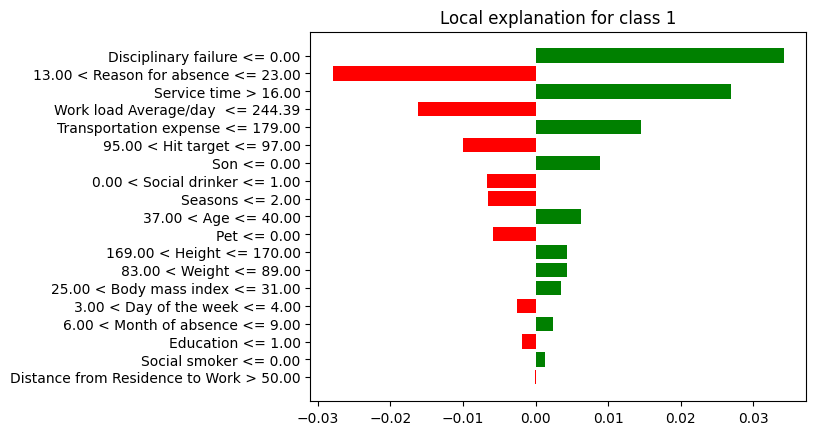

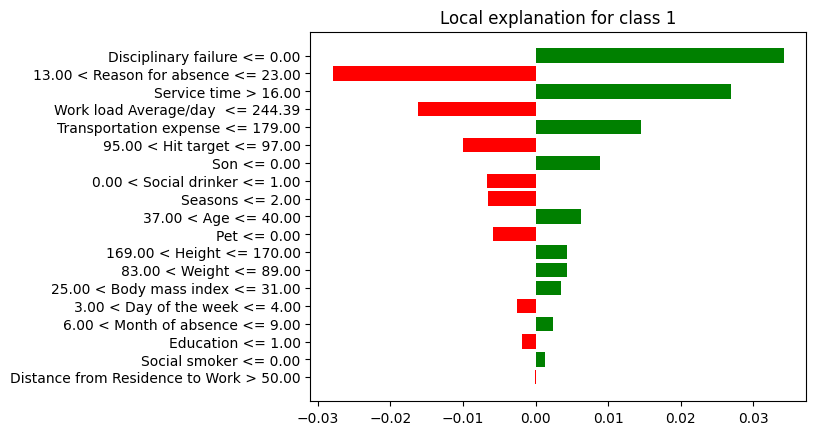

In [87]:
''' STEP THREE - Visualise explanation '''
i = 2 # index of the data point to explain
exp = explainer.explain_instance(X.values[i], clf.predict_proba, num_features=30)

# Print the explanation
print(exp.as_list())


lst = exp.as_list()

for x in lst:
  print(x, "\n")


exp.show_in_notebook()

exp.as_pyplot_figure()

### LIME with Linear Regression [Your Task - Assessed Task 1]

Now, let's try using LIME to explain the outcome of a linear regression model.
Dataset: Student performance https://archive.ics.uci.edu/dataset/320/student+performance

[('school <= 0.00', 2.1013815408362615), ('guardian <= 1.00', -0.9668168592907728), ('paid <= 0.00', 0.9345193836064907), ('1.00 < Dalc <= 2.00', 0.8295229950108064), ('schoolsup > 0.00', -0.7897367247652902), ('Fedu <= 1.00', -0.7677726709219501), ('Medu <= 2.00', 0.767499084752629), ('failures <= 0.00', -0.7115689265418398), ('Fjob <= 2.00', 0.6532451384547732), ('freetime <= 3.00', 0.5791141257563951), ('famsup <= 0.00', -0.5764475546518525), ('age <= 16.00', -0.5641679401157673), ('1.00 < studytime <= 2.00', -0.5413679681926694), ('romantic <= 0.00', -0.47424131099492756), ('famrel <= 4.00', 0.4654812255431809), ('sex <= 0.00', 0.36110553538709794), ('goout <= 2.00', -0.33840688283668174), ('Mjob <= 1.00', -0.3155815731461659), ('2.00 < Walc <= 3.00', 0.29422174819949054), ('traveltime <= 1.00', -0.2848814751553539), ('0.00 < famsize <= 1.00', -0.23905554640738605), ('0.00 < address <= 1.00', 0.15039059948783076), ('1.00 < reason <= 2.00', 0.030500015454216774), ('2.00 < health <= 

c:\Users\Daryl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


"\nHint: For regression set the mode to regression in the explainer\n\n\nexplainer = LimeTabularExplainer(\n    X_np,\n    feature_names=feature_names,\n    mode='regression',\n    discretize_continuous=True\n)\n\n"

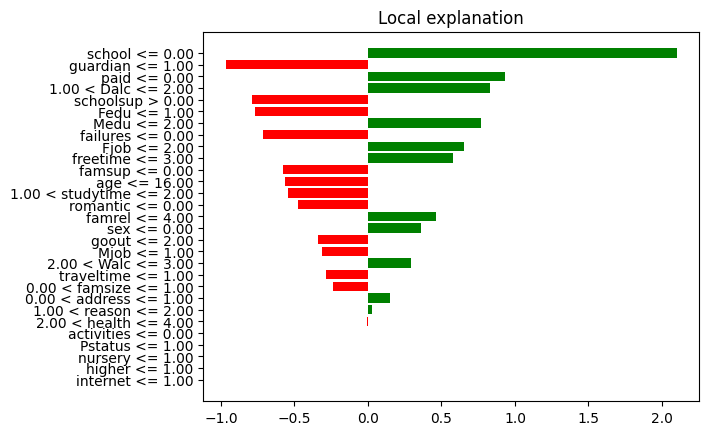

In [ ]:
from sklearn.linear_model import LinearRegression
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
 
X_df = student_performance.data.features 

categorical_cols = X_df.select_dtypes(include=['object']).columns


for col in categorical_cols:
    X_df.loc[:, col] = X_df[col].astype('category').cat.codes

X_df.head()

y = X_df['absences']          
X = X_df.drop(columns=['absences']) 


clf = LinearRegression().fit(X, y)


# lets assign names to our clusters
cluster_names = ['cluster-' + str(i) for i in range(0, k)]

# Convert the dataframe to a numpy array
X_np = X.values
explainer = LimeTabularExplainer(X_np, feature_names=X.columns.tolist(), mode='regression', discretize_continuous=True)


i = 2 # index of the data point to explain
exp = explainer.explain_instance(X_np[i], clf.predict, num_features=30)

# Print the explanation
print(exp.as_list())


lst = exp.as_list()

for x in lst:
  print(x, "\n")


exp.show_in_notebook()

exp.as_pyplot_figure()


'''
Hint: For regression set the mode to regression in the explainer


explainer = LimeTabularExplainer(
    X_np,
    feature_names=feature_names,
    mode='regression',
    discretize_continuous=True
)

'''


### LIME with KNN [Your Task]

Dataset: Online shopping: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [93]:
from sklearn.neighbors import KNeighborsClassifier 
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 


categorical_cols = X.select_dtypes(include=['object']).columns


for col in categorical_cols:
    X.loc[:, col] = X[col].astype('category').cat.codes

print(X.head())

# student_performance = fetch_ucirepo(id=320) 
  
 
# X_df = student_performance.data.features 




# X_df.head()
  

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0     2                 1   
1         0.00       0.10         0.0         0.0     2   

### Lime with K-means clustering

In our lessons, we implemented k-means clustering ourselves, without the use of a library. Today we won't be going that, instead we will be using scikit-learn to create this model and integrating that with LIME


Dataset: Absenteeism at work (https://archive.ics.uci.edu/dataset/445/absenteeism+at+work)

Our tasks:

1. Use k-means clustering to cluster our data
2. Inspect the clusters just
3. Integrate LIME
4. See whst conttibuted towards a clustering

Note: to explain clustering we will treat it like a classification problem. To do this we will:

a. Perform clustering

b. Train a random forest using the labels obtained from the clustering algorithm - for classification

c. Use LIME to explain the classifier

In [36]:
''' STEP ONE '''
from sklearn.cluster import KMeans
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
absenteeism_at_work = fetch_ucirepo(id=445) 
  

X_df = absenteeism_at_work.data.features  

# quick peek
print(X_df.head())
X_df.head()

# no.of clusters
k = 3

# we perform k means clustring here
kmeans = KMeans(n_clusters=k).fit(X_df)
# this is the prediction for each entry in the dataset... values should range from
# 0 to k - 1
cluster_labels = kmeans.labels_
print(cluster_labels)

   Reason for absence  Month of absence  Day of the week  Seasons  \
0                  26                 7                3        1   
1                   0                 7                3        1   
2                  23                 7                4        1   
3                   7                 7                5        1   
4                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   Hit target  Disciplinary failure  Education  Son  \
0                 2

In [37]:
''' STEP TWO '''
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_df, cluster_labels)

In [38]:
''' STEP THREE '''
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# lets assign names to our clusters
cluster_names = ['cluster-' + str(i) for i in range(0, k)]

# Convert the dataframe to a numpy array
X_np = X_df.values
explainer = LimeTabularExplainer(X_np, feature_names=ABSENTEEISM_FEATURE_LIST, class_names=cluster_names, discretize_continuous=True)

'''
Note of discretize_continuous:

When set to True, LIME will discretize (bin) continuous features into categorical bins (like "low", "medium", "high") before fitting the surrogate model.
This means that, instead of using the raw numeric values, LIME splits the values into intervals (bins) and treats each interval as a separate category during explanation generation.
The bin boundaries are determined based on quantiles of the feature's distribution in the training data.


Try turning this to False and observing what happens

'''

'\nNote of discretize_continuous:\n\nWhen set to True, LIME will discretize (bin) continuous features into categorical bins (like "low", "medium", "high") before fitting the surrogate model.\nThis means that, instead of using the raw numeric values, LIME splits the values into intervals (bins) and treats each interval as a separate category during explanation generation.\nThe bin boundaries are determined based on quantiles of the feature\'s distribution in the training data.\n\n\nTry turning this to False and observing what happens\n\n'

In [39]:
''' STEP FOUR '''
# Explain a sample
i = 2 # index of the data point to explain
exp = explainer.explain_instance(X_np[i], clf.predict_proba, num_features=5)

# Print the explanation
print(exp.as_list())


[('Age <= 244.39', -0.17092412190789194), ('6.00 < Reason for absence <= 9.00', -0.02761364740969349), ('Seasons <= 179.00', 0.01558088234487739), ('Distance from Residence to Work > 16.00', 0.012494029904299942), ('83.00 < Pet <= 89.00', -0.012181116327378654)]


c:\Users\Daryl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [40]:
lst = exp.as_list()

for x in lst:
  print(x, "\n")

('Age <= 244.39', -0.17092412190789194) 

('6.00 < Reason for absence <= 9.00', -0.02761364740969349) 

('Seasons <= 179.00', 0.01558088234487739) 

('Distance from Residence to Work > 16.00', 0.012494029904299942) 

('83.00 < Pet <= 89.00', -0.012181116327378654) 



In [41]:
exp.show_in_notebook()

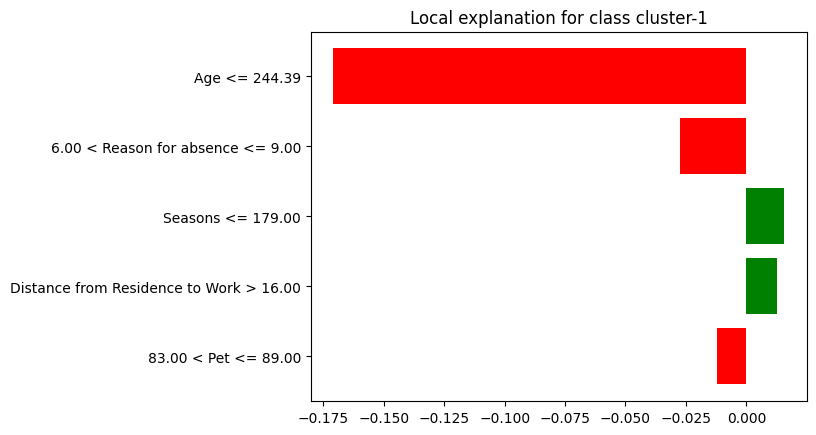

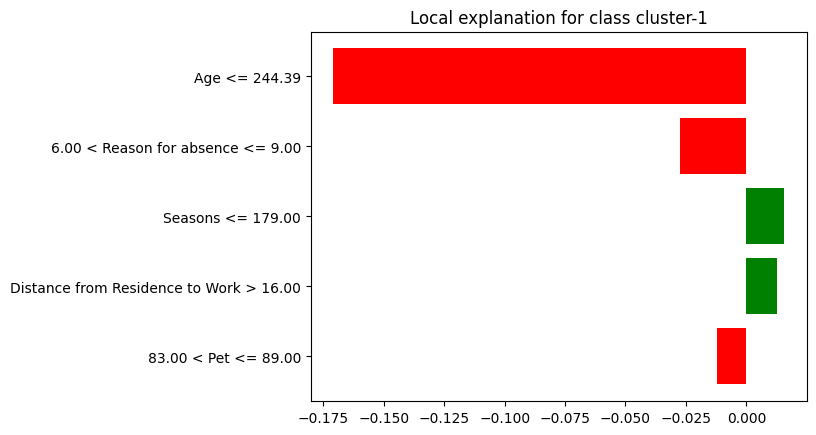

In [42]:

# Visualize the explanation
exp.as_pyplot_figure()

## More LIME ... working with Text Data

In [43]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

# 1. Load Data
categories = ['sci.med', 'sci.space', 'misc.forsale']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
X = data.data
y = data.target
class_names = data.target_names

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. Pipeline: TF-IDF + Naive Bayes
vectorizer = TfidfVectorizer()
model = MultinomialNB()
pipeline = make_pipeline(vectorizer, model)
pipeline.fit(X_train, y_train)

# 4. LIME Explanation
explainer = LimeTextExplainer(class_names=class_names)
idx = 0  # Index of the test instance to explain
exp = explainer.explain_instance(X_test[idx], pipeline.predict_proba, num_features=6)

print(f'True label: {class_names[y_test[idx]]}')
print(f'Predicted probabilities: {pipeline.predict_proba([X_test[idx]])[0]}')
print('\nLIME explanation:')
for word, weight in exp.as_list():
    direction = "increased" if weight > 0 else "decreased"
    print(f"- Presence of '{word}' {direction} the likelihood by {abs(weight):.3f}")

True label: sci.med
Predicted probabilities: [0.02151078 0.93026622 0.048223  ]

LIME explanation:
- Presence of 'compartment' decreased the likelihood by 0.098
- Presence of 'Skepticism' increased the likelihood by 0.041
- Presence of 'surrender' increased the likelihood by 0.041
- Presence of 'intellect' increased the likelihood by 0.041
- Presence of 'geb' increased the likelihood by 0.040
- Presence of 'Gordon' increased the likelihood by 0.040


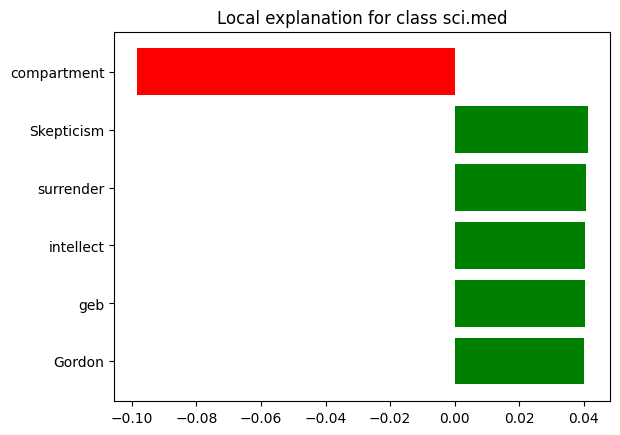

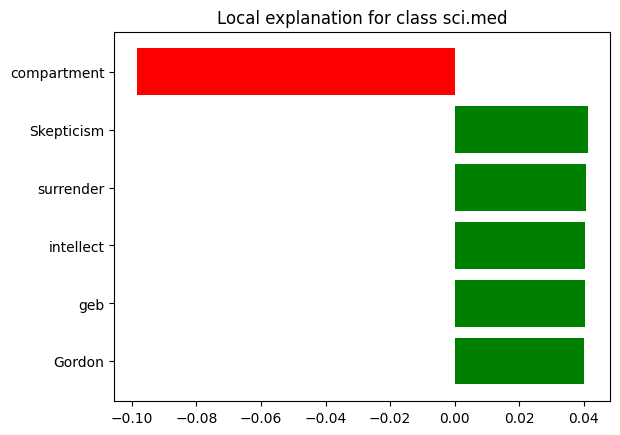

In [44]:
exp.as_pyplot_figure()

In [45]:
exp.show_in_notebook()

### Using LIME to explain Ham/Spam classification

The example above was meant to demonstrate how LIME works on Text data. While this uses a MultinomialNB, try implementing the same for a Ham/Spam classifier. The output will be more familiar and open for criticism.

Use the spambase dataaset available here: https://archive.ics.uci.edu/dataset/94/spambase


## Even More LIME... Working with Image Data

This is going to be the most time consuming task for today, remember we worked on a CNN that classified the MINST dataset? We are going to use that with the LIMEImageExplainer.....

In the meantime, read this article to see how it works on image datasets: https://yashvaantlakham73.medium.com/interpretable-image-classification-using-lime-061cc90e70ac

Keep in mind that this will be quite different from how we use it today

In [46]:
''' All imports have been done for you '''
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
from lime.lime_image import LimeImageExplainer
from skimage.segmentation import slic



''' The dataset has been loaded as well '''
transform = transforms.Compose([
    transforms.ToTensor(),  # shape (1, 28, 28)
    transforms.Lambda(lambda x: x.repeat(3, 1, 1))  # shape (3, 28, 28)
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=1000, shuffle=False)


''' Add your CNN here - create it, train it,... (few epochs)'''






''' Now let's explain it'''

explainer = LimeImageExplainer()
explanation = explainer.explain_instance(
    img.astype(np.double),
    predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000,
    segmentation_fn=lambda x: slic(x, n_segments=8, compactness=1, sigma=1)
)

'''visualising the explanation'''
from skimage.color import label2rgb
import matplotlib.pyplot as plt

label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(
    label,
    positive_only=True,
    num_features=5,
    hide_rest=False
)

print(f"True label: {true_label}")
print(f"Predicted probabilities: {predict_fn([img])[0]}")
plt.imshow(label2rgb(mask, img, bg_label=0))
plt.title(f"LIME explanation for class {label}")
plt.axis('off')
plt.show()



c:\Users\Daryl\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:03<00:00, 2604450.54it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 339280.51it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:01<00:00, 1252989.42it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 4543412.54it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



NameError: name 'img' is not defined

## SHAP

Let's see how shap works on a Random Forest classifier

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

# Load dataset - we are using the iris sataset for ease
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

# as seen previously
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Explain predictions using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)


# 5. Show SHAP values for the first prediction -- we are not going to visaulise outputs here...
print(f"True label: {class_names[y_test[0]]}")
print(f"Predicted probabilities: {rf.predict_proba([X_test[0]])[0]}")
print("SHAP values for first test example (per class):")
for i, class_name in enumerate(class_names):
    print(f"\nClass: {class_name}")
    for fname, value in zip(feature_names, shap_values[i][0]):
        direction = "increases" if value > 0 else "decreases"
        print(f"- {fname}: {direction} the probability by {abs(value):.4f}")

### Apply SHAP to a linear regression model and explain it using a variable  importance and summary plot [Your Task: Assessed Task 3 (Assignment)]

Dataset: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set



Todo:
1. Implement a linear regression model
2. Use SHAP to explain a prediction
3. Explain these predictions using a variable importance and summary plot

## Explanations (the easy way) [Your Task: Assessed Task 2]

In our last lecture we discussed how earlier explanations have been generated without necessarily consulting the social sciences and entirely based on the intuition of developers. Today we will be doing just that. Using the outcome of the methods seen above, we will create "templates" which we will then use to convert these explanations into text based explanation. For this we will be creating a simple python function and a number of templates.


The idea is to get you thinking about the quality of these explantions, if they are meaningful to end-users and how they could be improved should you be developing a model for decision support where explanations are required.



What is expected of you:

Using the example given as a guide, perform the following tasks:
1. Create a text based explanation for LimeTabularExplainer and demonstrate it.
2. Create a text based explanation for LimeTextExplainer and demonstrate it.
3. Write a very short text (at most 5 sentences) on how you could potentially improve it and why.... (why meaning why you think that improvement is meaningful)



In [ ]:
'''
Consider this example:
Note this is very simplistic and not realistic but works!
'''

explanations = [
    ('Transportation expense <= 179.00', 0.5665400895433051)
]

template = 'the {} is {}'


def split_text(text):
  delimeter = None
  if "<" in text:
    delimeter = "<"
  elif ">" in text:
    delimeter = ">"
  elif "=" in text:
    delimeter = "="

  if delimeter is not None:
    val = text.split(delimeter)
    val[-1] = delimeter + val[-1]
    return val

  else:
    return text




for explanation in explanations:

    print(template.format(*split_text(explanation[0])))


In [ ]:
'''
Step 1: Convert any number of explanations obtained above using lime into a list (demonstration above)
'''

In [ ]:
'''
Step 2: Create a simple template such that you can pass the explanation to this template (demonstration above)
'''

In [ ]:
'''
Step 3: Make these explanations, criticise it, how can you improve it?
'''

## What Next?

- Interpretable Machine Learning: A Guide for Making Black Box Models Explainable https://christophm.github.io/interpretable-ml-book/